<a href="https://colab.research.google.com/github/AsraSelen/Statistical-Learning-from-Data-Applications-in-Physics-HW/blob/main/HW1PART2_FIZ437.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

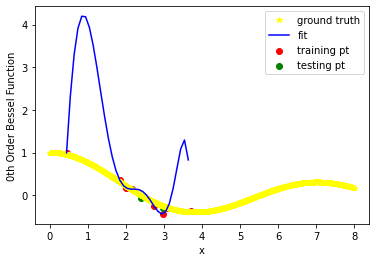

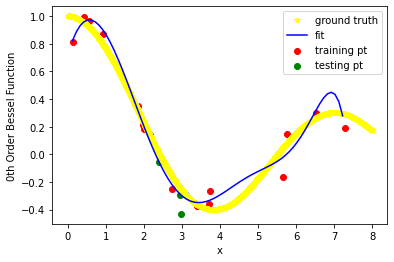

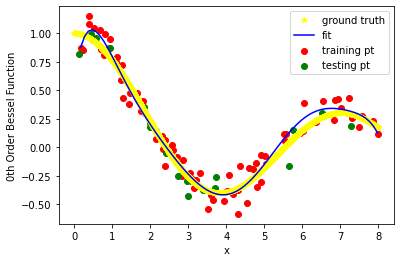

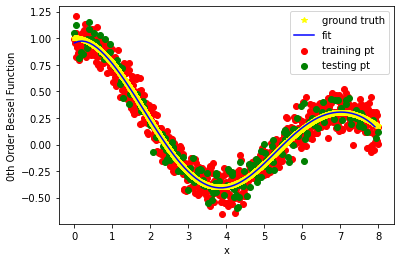

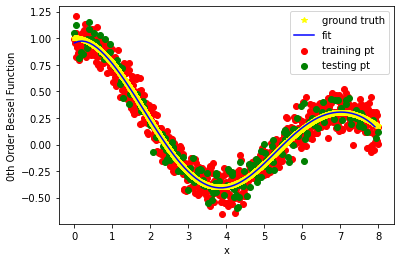

In [1]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
import random
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
x=np.reshape(np.linspace(0,8,1000),(1000,1))
J0=np.reshape(sp.jv(0,x),(1000,1)) 
target0=np.hstack((x,J0+0.1*np.reshape(np.random.normal(0, 1, 1000),(1000,1))))
xf=target0[:,0]
yf=target0[:,1]
np.random.shuffle(target0)
list=[10,20,100,1000,10000] 

for d in range(len(list)):
 target=target0[:int(list[d]),:]
 validset=(target[:int(0.2*len(target)),:])
 trainset=target[int(0.2*len(target)):int(len(target)),:]
 X=np.reshape(trainset[:,0],(-1,1))
 y=trainset[:,1]
 poly_reg = PolynomialFeatures(degree = 8) 
 X_poly= poly_reg.fit_transform(X) 
 poly_reg.fit(X_poly, y) 
 lin_reg_2 = LinearRegression() 
 lin_reg_2.fit(X_poly,y)
 X_grid = np.arange(min(X), max(X), 0.1) 
 X_grid = X_grid.reshape((len(X_grid), 1)) 
 plt.scatter(X, y, label="training pt",color = 'red') 
 plt.plot(x,J0,'*',label="ground truth",color='yellow')
 y_pred=lin_reg_2.predict(poly_reg.fit_transform(X_grid))
 plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)),label="fit" ,color = 'blue') 
 plt.scatter(validset[:,0],validset[:,1],label="testing pt", color = "green")
 plt.xlabel('x') 
 plt.ylabel('0th Order Bessel Function')   #legend ekle!! true func,predicted func, data scattering
 plt.legend()
 plt.show()